In [16]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [22]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.0


In [23]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
st = EventAccumulator("../log/stanford40_1cent_cos_vit_b16_adam_b256_lr_3e-4_4repeat/")
st.Reload()
print(st.Tags())
st_acc = pd.DataFrame(st.Scalars('val_nmi'))
# filepath = '../log/csv/stanford40_1cent_cos_vit_b16.csv'
# st_acc.to_csv(filepath)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Learning_rate', 'train_Loss', 'train_accuracy', 'centroids_similarity', 'val_acc', 'val_nmi', 'val_ari'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [24]:
# mit = EventAccumulator("../text_guided_record3/stanford40_5cent_vit_b16_adam_b256_lr_3e-4_4repeat/events.out.tfevents.1654224016.vdsl.17742.0")
# mit.Reload()
# print(mit.Tags())
# mit_acc = pd.DataFrame(mit.Scalars('val_acc'))
# # filepath = '../log/csv/mit_1cent_cos_vit_b16.csv'
# # mit_acc.to_csv(filepath)

In [25]:
import copy
mit_acc = copy.deepcopy(st_acc)


In [26]:
mit_acc = mit_acc[:300]
mit_acc['value'] = np.array([0.614 for x in range(300)])

In [27]:
st_acc = st_acc[:300]
st_acc

,wall_time,step,value
0,1.655646e+09,3,0.624876
1,1.655647e+09,7,0.625444
2,1.655647e+09,11,0.630426
3,1.655648e+09,15,0.631809
4,1.655649e+09,19,0.641608
...,...,...,...
295,1.655783e+09,1183,0.799855
296,1.655784e+09,1187,0.802073
297,1.655784e+09,1191,0.800901
298,1.655784e+09,1195,0.800108


Text(0.5, 1.0, 'Stanford40')

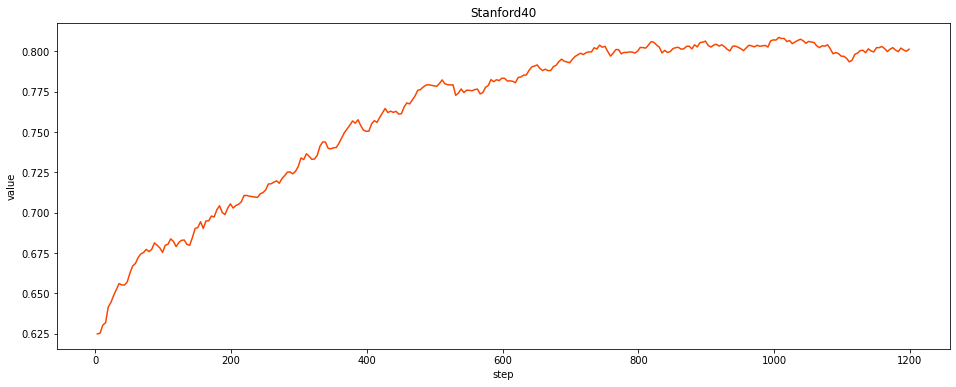

In [28]:
import seaborn as sns
palette1 = sns.color_palette('bright',1)
palette2 = sns.color_palette('bright',2)
total_df = pd.DataFrame()
plt.figure(figsize=(16, 6))
# sns.lineplot(data=mit_acc, x="step", y="value")
sns.lineplot(data=st_acc, x="step", y="value",color='#FA4500').set_title("Stanford40")

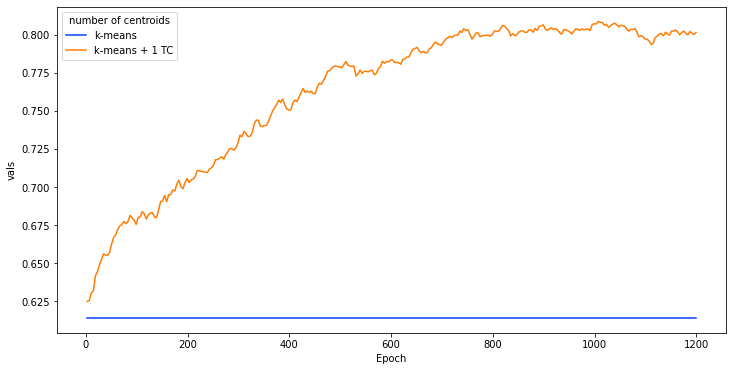

In [32]:
import seaborn as sns
total_df = pd.DataFrame({'Epoch':mit_acc['step'], 'k-means': mit_acc['value'], 'k-means + 1 TC': st_acc['value']})
plt.figure(figsize=(12, 6))
df = total_df.melt('Epoch', var_name='number of centroids',  value_name='vals')
g = sns.lineplot(x="Epoch",y='vals',hue='number of centroids',data=df,palette=palette2)

In [30]:
mit_acc.head()

,wall_time,step,value
0,1.655646e+09,3,0.614
1,1.655647e+09,7,0.614
2,1.655647e+09,11,0.614
3,1.655648e+09,15,0.614
4,1.655649e+09,19,0.614


### mean, std 계산기

In [48]:
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
st = EventAccumulator("../log/cifar10_1cent_vit_cos_b16_adam_b256_lr_3e-4_4repeat/")
st.Reload()
print(st.Tags())
st_nmi = pd.DataFrame(st.Scalars('val_nmi'))
st_acc = pd.DataFrame(st.Scalars('val_acc'))
st_ari = pd.DataFrame(st.Scalars('val_ari'))
st_list = [st_nmi,st_acc,st_ari]
# filepath = '../log/csv/stanford40_1cent_cos_vit_b16.csv'
# st_acc.to_csv(filepath)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Learning_rate', 'train_Loss', 'train_accuracy', 'centroids_similarity', 'val_acc', 'val_nmi', 'val_ari'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [49]:
metric_order = ['nmi','acc','ari']
for i,item in enumerate(st_list):
    item_end = item[250//4:300//4]
    item_np = np.array(item_end['value'])
    print(metric_order[i])
    print('mean:',np.mean(item_np))
    print('std:',np.std(item_np))
    print('---------------------')

nmi
mean: 0.8318101809575007
std: 0.00341588240325963
---------------------
acc
mean: 0.8395141042195834
std: 0.003264571478967556
---------------------
ari
mean: 0.7829062617742099
std: 0.004757336351689331
---------------------


In [32]:
st_np = np.array(st_end['value'])

In [33]:
mean = np.mean(st_np)
std= np.std(st_np)

In [34]:
print(mean,std)

0.6357312667369842 0.015142035999117384


In [35]:
st_np

array([0.6171487 , 0.61405706, 0.61419976, 0.61822754, 0.61809367,
       0.62108189, 0.62281817, 0.61831075, 0.61895758, 0.62005877,
       0.62361729, 0.61655766, 0.61557323, 0.6210357 , 0.61855203,
       0.62402743, 0.6239059 , 0.62271202, 0.6238091 , 0.62805146,
       0.6284399 , 0.62783802, 0.6252653 , 0.63364732, 0.63571686,
       0.63780606, 0.63991791, 0.64050472, 0.64106882, 0.6404928 ,
       0.64447916, 0.64941746, 0.64661562, 0.64620113, 0.64874691,
       0.65074313, 0.65017325, 0.64883584, 0.64859676, 0.646752  ,
       0.64510542, 0.64847577, 0.64802831, 0.64934039, 0.65429705,
       0.65681159, 0.65954882, 0.66228443, 0.66534579, 0.6652711 ])